# Readability and Style Analysis
This notebook compares emails from Katrina Armstrong and Minouche Shafik by calculating text readability and writing style metrics such as Flesch-Kincaid Grade Level and average sentence/word lengths.

In [5]:
import pandas as pd

# Load data
df_katrina = pd.read_excel("Katrina.xlsx")
df_minouche = pd.read_excel("Minouche.xlsx")

# Preview
df_katrina.head(), df_minouche.head()

(                                               Title             Date  \
 0                 Sharing Progress on Our Priorities  3/21/2025 16:09   
 1                                     Our Next Steps  3/19/2025 12:32   
 2                     Standing Together for Columbia  3/15/2025 16:57   
 3  Update to Our Community Regarding DHS Activity...  3/13/2025 20:58   
 4  Columbia's Commitment to Our International Com...  3/13/2025 15:00   
 
                                              Content  
 0  Dear fellow members of the Columbia community:...  
 1  Dear fellow members of the Columbia community:...  
 2  Dear fellow members of our Columbia community:...  
 3  Dear fellow members of the Columbia community:...  
 4  Dear fellow members of the Columbia community:...  ,
                                                Title                Date  \
 0        Announcement from President Minouche Shafik 2024-08-15 00:00:50   
 1                           Update for Our Community 2024-07-2

In [6]:
import textstat

# Drop missing values and convert to list
katrina_texts = df_katrina['Content'].dropna().tolist()
minouche_texts = df_minouche['Content'].dropna().tolist()

# Function to compute readability stats
def compute_stats(texts):
    return {
        "flesch_kincaid": sum(textstat.flesch_kincaid_grade(text) for text in texts) / len(texts),
        "flesch_reading_ease": sum(textstat.flesch_reading_ease(text) for text in texts) / len(texts),
        "avg_sentence_length": sum(textstat.avg_sentence_length(text) for text in texts) / len(texts),
        "avg_syllables_per_word": sum(textstat.avg_syllables_per_word(text) for text in texts) / len(texts),
        "avg_letter_per_word": sum(textstat.avg_letter_per_word(text) for text in texts) / len(texts)
    }

# Calculate stats
katrina_stats = compute_stats(katrina_texts)
minouche_stats = compute_stats(minouche_texts)

# Combine results
readability_df = pd.DataFrame([katrina_stats, minouche_stats], index=["Katrina", "Minouche"])
readability_df

,flesch_kincaid,flesch_reading_ease,avg_sentence_length,avg_syllables_per_word,avg_letter_per_word
Katrina,14.800000,29.994483,23.048276,1.813793,5.277931
Minouche,14.229412,31.907647,21.823529,1.805882,5.458235


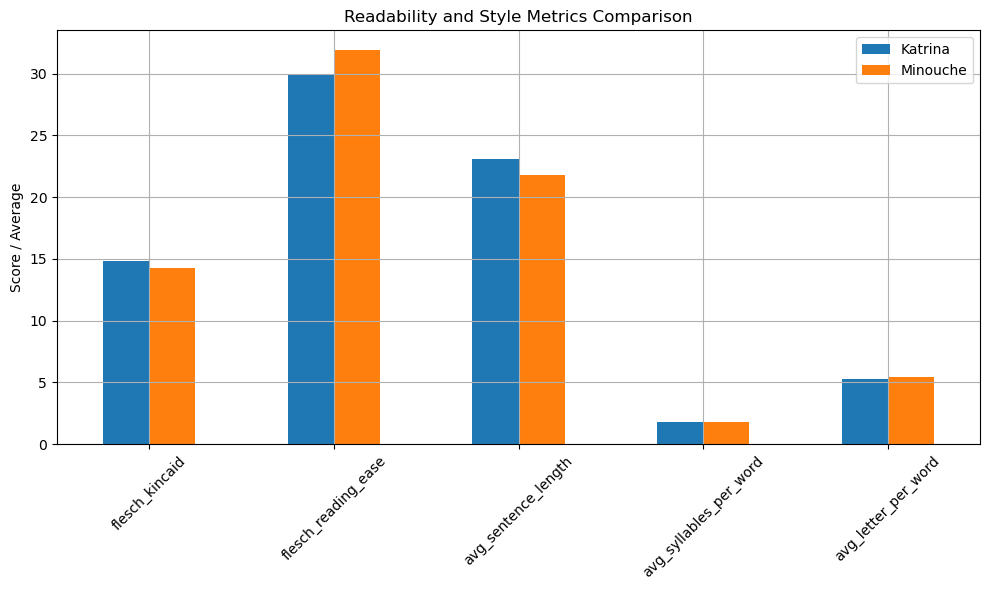

In [7]:
import matplotlib.pyplot as plt

readability_df.T.plot(kind='bar', figsize=(10, 6))
plt.title("Readability and Style Metrics Comparison")
plt.ylabel("Score / Average")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()